In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [ ]:
horse = pd.read_csv('horse.csv')
horse.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [ ]:
horse.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [ ]:
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [ ]:
print(horse.apply(lambda col: col.unique()))

surgery                                                          [no, yes]
age                                                         [adult, young]
hospital_number          [530101, 534817, 530334, 5290409, 530255, 5283...
rectal_temp              [38.5, 39.2, 38.3, 39.1, 37.3, nan, 37.9, 38.1...
pulse                    [66.0, 88.0, 40.0, 164.0, 104.0, nan, 48.0, 60...
respiratory_rate         [28.0, 20.0, 24.0, 84.0, 35.0, nan, 16.0, 36.0...
temp_of_extremities                        [cool, nan, normal, cold, warm]
peripheral_pulse                 [reduced, nan, normal, absent, increased]
mucous_membrane          [nan, pale_cyanotic, pale_pink, dark_cyanotic,...
capillary_refill_time                     [more_3_sec, less_3_sec, nan, 3]
pain                     [extreme_pain, mild_pain, depressed, nan, seve...
peristalsis                 [absent, hypomotile, nan, hypermotile, normal]
abdominal_distention                 [severe, slight, none, nan, moderate]
nasogastric_tube         

In [ ]:
# Continuous: hostpital_number, rectal_temp, pulse, respiratory_rate, nasogastric_reflux_ph, packed_cell_volume, total_protein,
# abdomo_protein, lesion_1

# Categorial: surgery, age, temp_of_extremities, peripheral_pulse, mucous_membrane, capillary_refill_time, pain, peristalsis,
# abdominal_distention, nasogastric_tube, nasogastric_reflux, rectal_exam_feces, abdomen, abdomo_appearance, outcome,
# surgical_lesion, cp_data, lesion_2, lesion_3 (classifying these as categoricals for now due to limited unique values)

In [ ]:
horse.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [ ]:
# dropping due to missing more than 50%
horse.drop(labels=['nasogastric_reflux_ph', 'abdomo_appearance', 'abdomo_protein'], axis=1, inplace=True)

In [ ]:
horse.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [ ]:
# dropping due to attribute being just an increment number with no meaning behind
horse.drop(labels=['hospital_number'], axis=1, inplace=True)

In [ ]:
# missing 30% attributes: Will take the modes for NA values for now and re-evaluate based on the model's accuracy later
horse['nasogastric_tube'].fillna(horse['nasogastric_tube'].mode()[0], inplace = True)
horse['nasogastric_reflux'].fillna(horse['nasogastric_reflux'].mode()[0], inplace = True)
horse['rectal_exam_feces'].fillna(horse['rectal_exam_feces'].mode()[0], inplace = True)
horse['abdomen'].fillna(horse['abdomen'].mode()[0], inplace = True)

In [ ]:
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   rectal_temp            239 non-null    float64
 3   pulse                  275 non-null    float64
 4   respiratory_rate       241 non-null    float64
 5   temp_of_extremities    243 non-null    object 
 6   peripheral_pulse       230 non-null    object 
 7   mucous_membrane        252 non-null    object 
 8   capillary_refill_time  267 non-null    object 
 9   pain                   244 non-null    object 
 10  peristalsis            255 non-null    object 
 11  abdominal_distention   243 non-null    object 
 12  nasogastric_tube       299 non-null    object 
 13  nasogastric_reflux     299 non-null    object 
 14  rectal_exam_feces      299 non-null    object 
 15  abdome

In [ ]:
# for the rest of the missing, fill NaN with mean for continuous variables and mode for categorical variables
horse['rectal_temp'].fillna(horse['rectal_temp'].mean(), inplace = True)
horse['pulse'].fillna(horse['pulse'].mean(), inplace = True)
horse['respiratory_rate'].fillna(horse['respiratory_rate'].mean(), inplace = True)
horse['packed_cell_volume'].fillna(horse['packed_cell_volume'].mean(), inplace = True)
horse['total_protein'].fillna(horse['total_protein'].mean(), inplace = True)

horse['temp_of_extremities'].fillna(horse['temp_of_extremities'].mode()[0], inplace = True)
horse['peripheral_pulse'].fillna(horse['peripheral_pulse'].mode()[0], inplace = True)
horse['mucous_membrane'].fillna(horse['mucous_membrane'].mode()[0], inplace = True)
horse['capillary_refill_time'].fillna(horse['capillary_refill_time'].mode()[0], inplace = True)
horse['pain'].fillna(horse['pain'].mode()[0], inplace = True)
horse['peristalsis'].fillna(horse['peristalsis'].mode()[0], inplace = True)
horse['abdominal_distention'].fillna(horse['abdominal_distention'].mode()[0], inplace = True)

In [ ]:
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   rectal_temp            299 non-null    float64
 3   pulse                  299 non-null    float64
 4   respiratory_rate       299 non-null    float64
 5   temp_of_extremities    299 non-null    object 
 6   peripheral_pulse       299 non-null    object 
 7   mucous_membrane        299 non-null    object 
 8   capillary_refill_time  299 non-null    object 
 9   pain                   299 non-null    object 
 10  peristalsis            299 non-null    object 
 11  abdominal_distention   299 non-null    object 
 12  nasogastric_tube       299 non-null    object 
 13  nasogastric_reflux     299 non-null    object 
 14  rectal_exam_feces      299 non-null    object 
 15  abdome

In [ ]:
print(horse.apply(lambda col: col.unique()))

surgery                                                          [no, yes]
age                                                         [adult, young]
rectal_temp              [38.5, 39.2, 38.3, 39.1, 37.3, 38.168619246861...
pulse                    [66.0, 88.0, 40.0, 164.0, 104.0, 72.0, 48.0, 6...
respiratory_rate         [28.0, 20.0, 24.0, 84.0, 35.0, 30.460580912863...
temp_of_extremities                             [cool, normal, cold, warm]
peripheral_pulse                      [reduced, normal, absent, increased]
mucous_membrane          [normal_pink, pale_cyanotic, pale_pink, dark_c...
capillary_refill_time                          [more_3_sec, less_3_sec, 3]
pain                     [extreme_pain, mild_pain, depressed, severe_pa...
peristalsis                      [absent, hypomotile, hypermotile, normal]
abdominal_distention                      [severe, slight, none, moderate]
nasogastric_tube                               [slight, none, significant]
nasogastric_reflux       

In [ ]:
# replacing outcome value "euthanized" with "died" for the purpose of building a boolean classification model to predict outcome
horse['outcome'] = horse['outcome'].replace('euthanized','died')

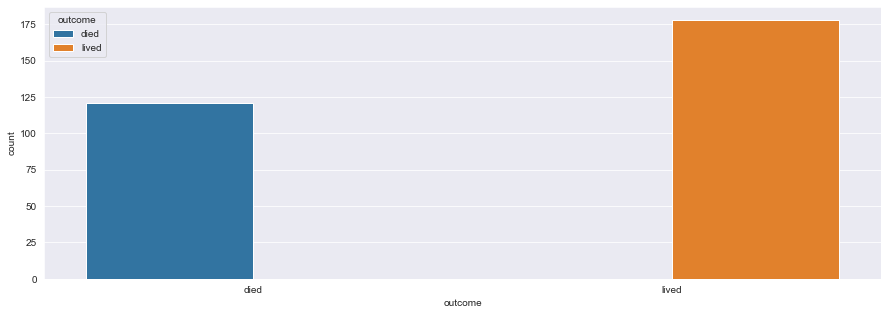

In [ ]:
sns.countplot(x = horse['outcome'], hue = 'outcome', data = horse)
plt.show()

### From the cell above, we can conclude that more horses lived when compared with the ones who died in the dataset.

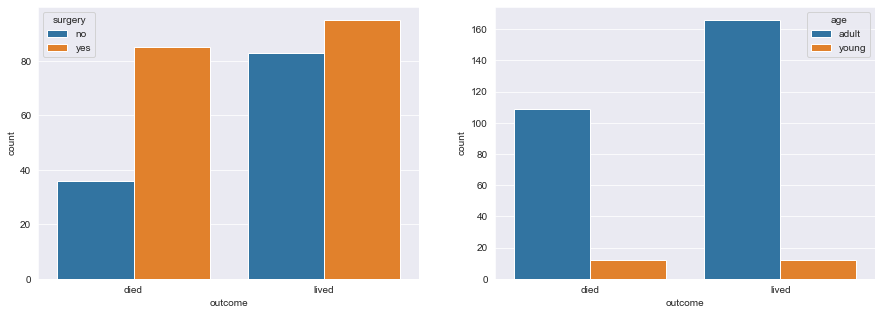

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.countplot(x = horse['outcome'], hue = 'surgery', data = horse, ax = axes[0])
sns.countplot(x = horse['outcome'], hue = 'age', data = horse, ax = axes[1])

plt.show()

### From the cell above, we can conclude that from the horses who died, more of them went through surgery than the ones who did not. We can also see that from the horses who died, more were adults than young horses.

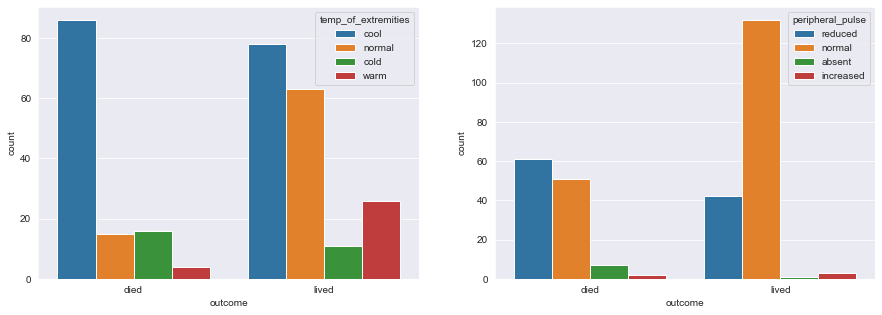

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.countplot(x = horse['outcome'], hue = 'temp_of_extremities', data = horse, ax = axes[0])
sns.countplot(x = horse['outcome'], hue = 'peripheral_pulse', data = horse, ax = axes[1])

plt.show()

### From the cell above, we can conclude that from the horses who died, most of them had a cool temperature in their extremities. This indicates that they possibly had shock from trauma, pain, or infection. On the graph on the right, we can conclude that from the horses who lived, most of them had a normal peripheral pulse which indicates that they had adequate circulation.

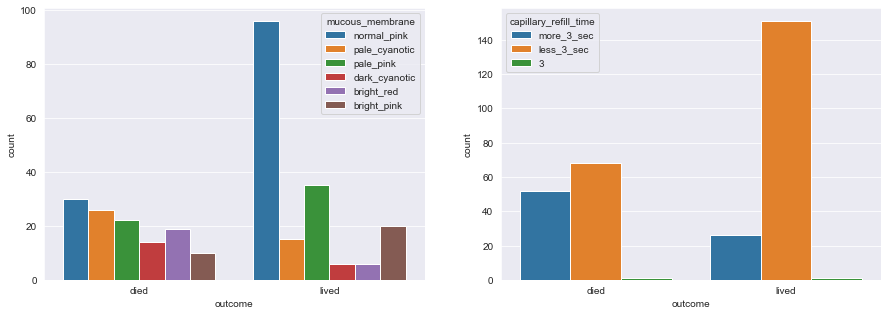

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.countplot(x = horse['outcome'], hue = 'mucous_membrane', data = horse, ax = axes[0])
sns.countplot(x = horse['outcome'], hue = 'capillary_refill_time', data = horse, ax = axes[1])

plt.show()

### From the cell above, we can conclude that from the horses who lived, most of them had a normal pink mucous membrane which indicates a normal circulation. On the right, we can also see that from the horses who lived, most of them had a capillary refill time of less than 3 seconds which also indicates a good circulation according to clinical judgments.

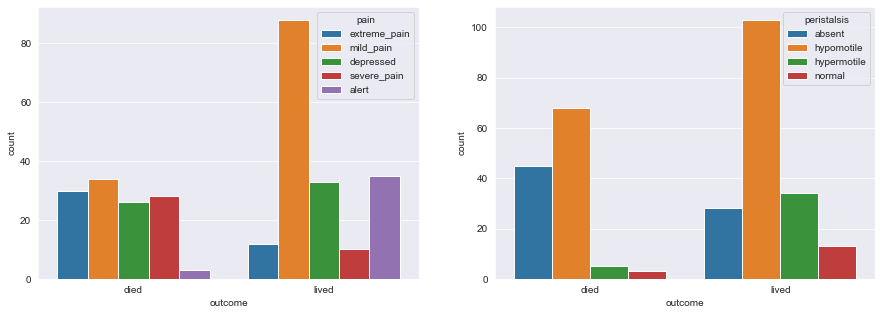

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.countplot(x = horse['outcome'], hue = 'pain', data = horse, ax = axes[0])
sns.countplot(x = horse['outcome'], hue = 'peristalsis', data = horse, ax = axes[1])

plt.show()

### From the cell above, we can conclude that from the horses who died, some of them had extreme pain, others mild pain, and others had severe pain. There is no clear pattern on the levels of pain to establish whether a horse would die or not.

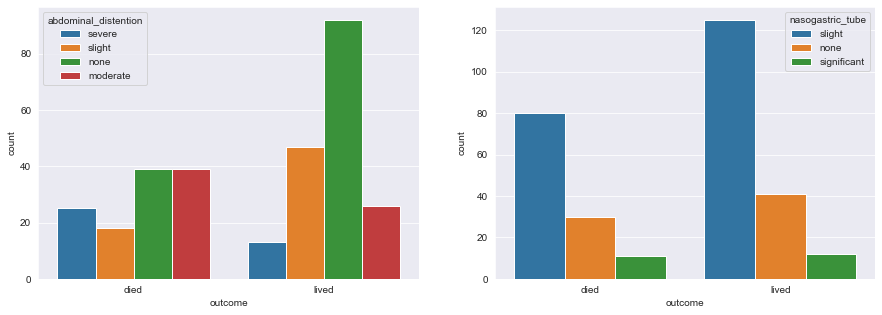

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.countplot(x = horse['outcome'], hue = 'abdominal_distention', data = horse, ax = axes[0])
sns.countplot(x = horse['outcome'], hue = 'nasogastric_tube', data = horse, ax = axes[1])

plt.show()

### From the cell above, we can conclude that from the horses who lived, most of them had none or a slight abdominal distention. This makes sense since having a moderate or severe abdominal distention is likely to require surgery. On the graph on the right we can see that having a slight nasogastric tube does not really give us an idea of whether a horse will live or die since it is high in both fields.

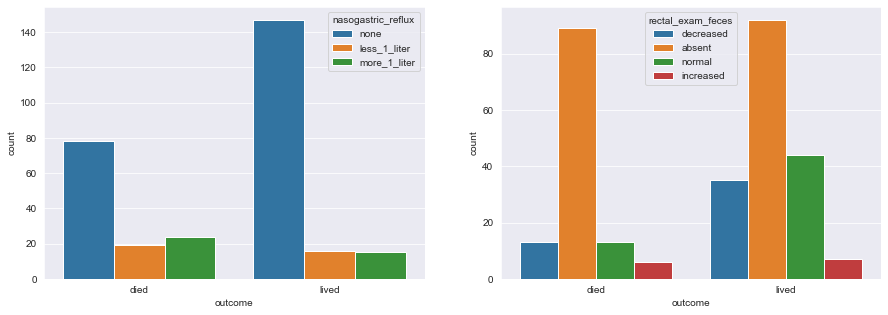

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.countplot(x = horse['outcome'], hue = 'nasogastric_reflux', data = horse, ax = axes[0])
sns.countplot(x = horse['outcome'], hue = 'rectal_exam_feces', data = horse, ax = axes[1])

plt.show()

### From the cell above, we can see that horses with no nasogastric reflux tend to have a bigger chance of living since there is no serious obstruction to the fluid passage from the rest of the intestine.

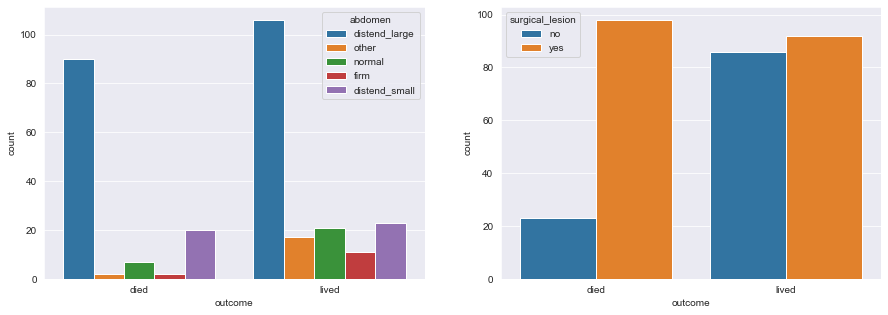

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.countplot(x = horse['outcome'], hue = 'abdomen', data = horse, ax = axes[0])
sns.countplot(x = horse['outcome'], hue = 'surgical_lesion', data = horse, ax = axes[1])

plt.show()

### The most important aspect of the cell above is that most of the horses that died from the dataset had a surgical lesion.

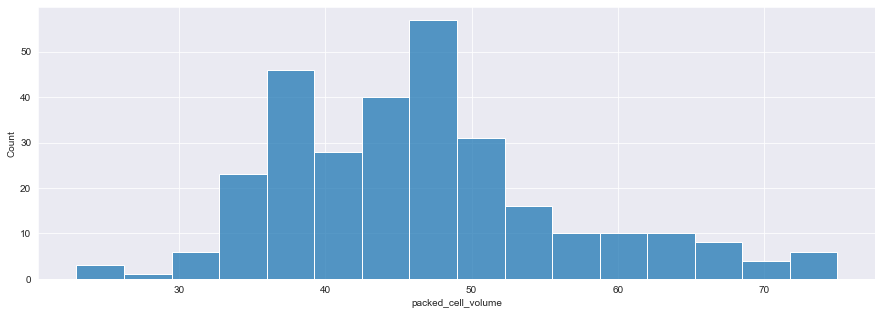

In [ ]:
sns.histplot(horse['packed_cell_volume'])
plt.show()

### From the cell above we can conclude that the packed cell volume mostly ranges from 30 to 60 on the horses in the dataset. This is considered a normal range.

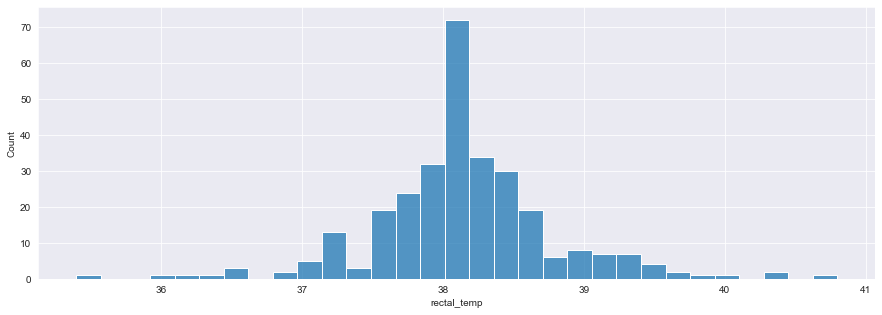

In [ ]:
sns.histplot(horse['rectal_temp'])
plt.show()

### From the cell above, we can conclude that the rectal temperature from the horses in the dataset mostly ranges from 37 to 39 degrees celsius which is considered a normal temperature by experts.

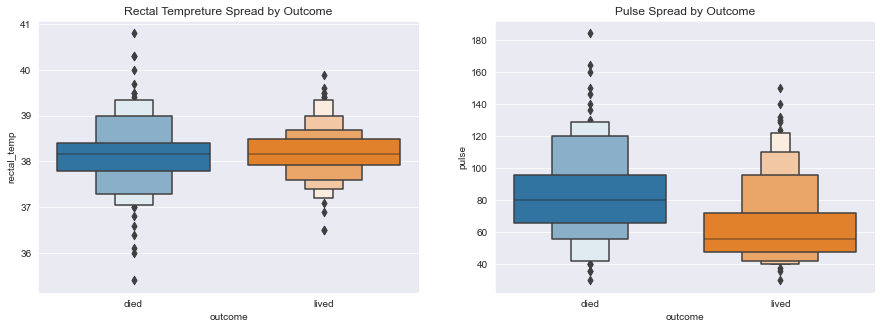

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.boxenplot(x = horse['outcome'], y = horse['rectal_temp'], data = horse, ax = axes[0])
axes[0].set_title('Rectal Tempreture Spread by Outcome')
sns.boxenplot(x = horse['outcome'], y = horse['pulse'], data = horse, ax = axes[1])
axes[1].set_title('Pulse Spread by Outcome')

plt.show()

### From the cell above, we can conclude that from the horses who died, the pulse ranged from 60 to 90 which indicates an elevated heart rate. From the horses who lived, we can see that in general the pulse rate was lower.

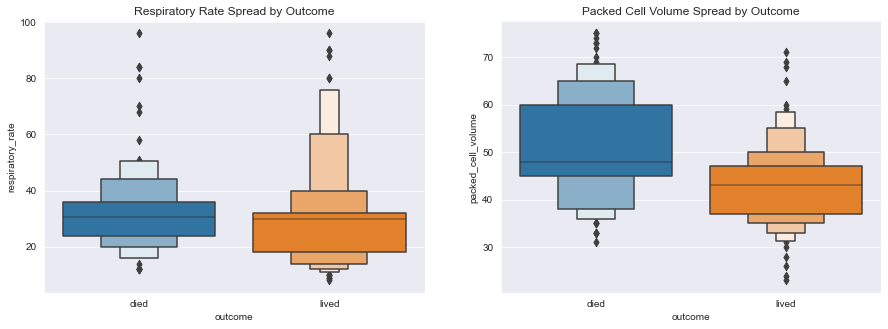

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.boxenplot(x = horse['outcome'], y = horse['respiratory_rate'], data = horse, ax = axes[0])
axes[0].set_title('Respiratory Rate Spread by Outcome')
sns.boxenplot(x = horse['outcome'], y = horse['packed_cell_volume'], data = horse, ax = axes[1])
axes[1].set_title('Packed Cell Volume Spread by Outcome')

plt.show()

### From the cell above, we can conclude that the packed cell volume was spread from 40 to 48 on the horses who lived.

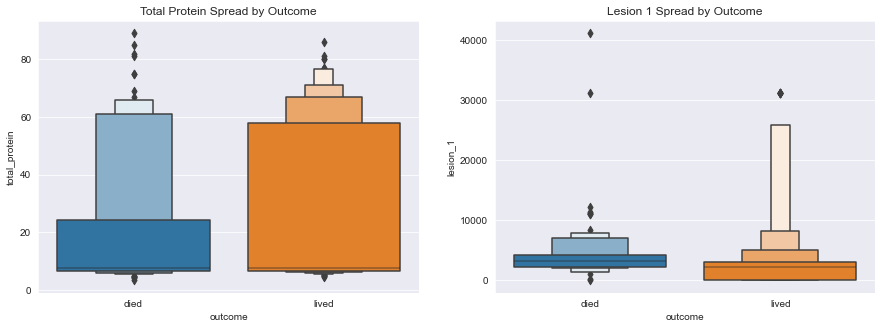

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.boxenplot(x = horse['outcome'], y = horse['total_protein'], data = horse, ax = axes[0])
axes[0].set_title('Total Protein Spread by Outcome')
sns.boxenplot(x = horse['outcome'], y = horse['lesion_1'], data = horse, ax = axes[1])
axes[1].set_title('Lesion 1 Spread by Outcome')

plt.show()

### From the cell above, we can conclude that out of the horses who died, the protein spread is around 20 to 60.

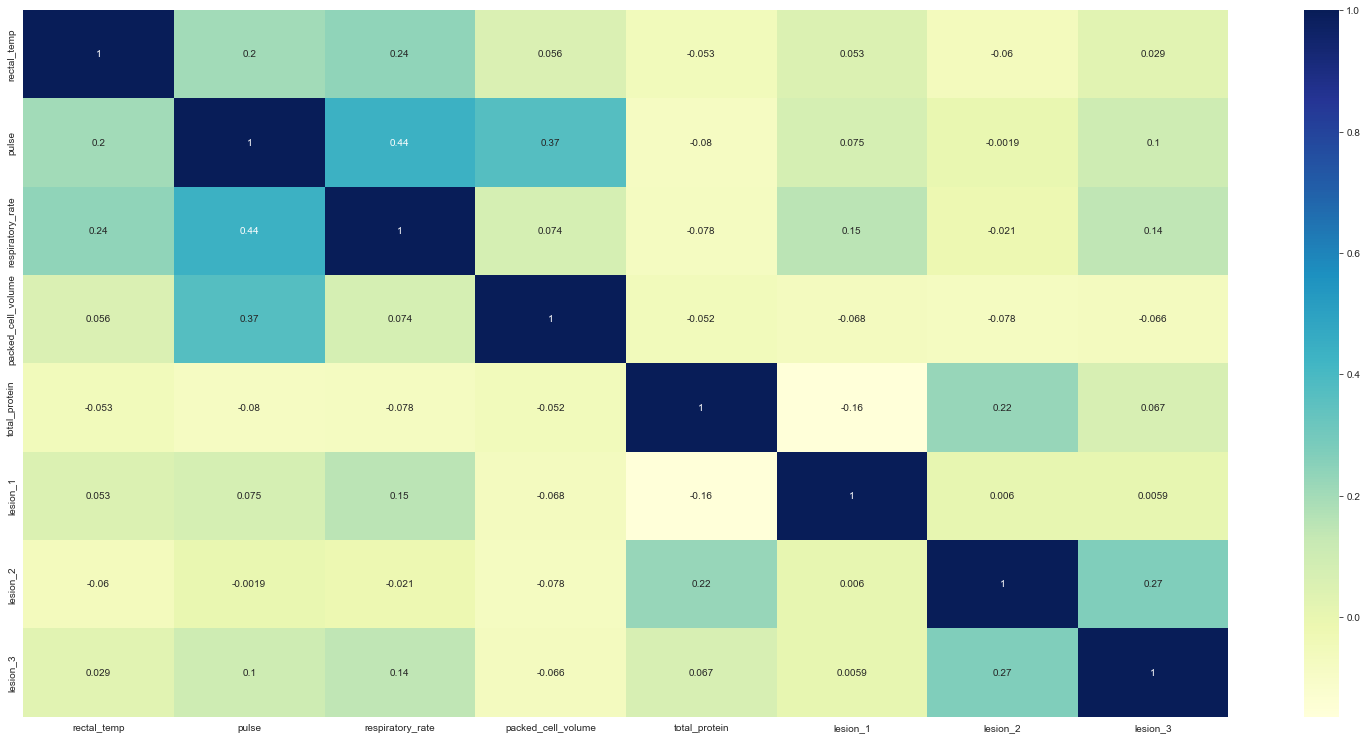

In [ ]:
rcParams['figure.figsize'] = 27, 13

sns.heatmap(horse.corr(), cmap="YlGnBu", annot = True)
plt.show()

### From the heatmap, we can conclude that the pulse and the respiratory rate are the variables that are correlated the most.

In [ ]:
numericals = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'lesion_1']

categoricals = ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 
                'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 
                'abdomen', 'outcome', 'surgical_lesion', 'lesion_2', 'lesion_3', 'cp_data']

In [ ]:
horse = pd.get_dummies(data=horse, columns=categoricals, drop_first=True)
horse.head()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,surgery_yes,age_young,temp_of_extremities_cool,temp_of_extremities_normal,...,abdomen_other,outcome_lived,surgical_lesion_yes,lesion_2_1400,lesion_2_3111,lesion_2_3112,lesion_2_6112,lesion_2_7111,lesion_3_2209,cp_data_yes
0,38.5,66.0,28.0,45.0,8.4,11300,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,39.2,88.0,20.0,50.0,85.0,2208,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,38.3,40.0,24.0,33.0,6.7,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,39.1,164.0,84.0,48.0,7.2,2208,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,37.3,104.0,35.0,74.0,7.4,4300,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rectal_temp                       299 non-null    float64
 1   pulse                             299 non-null    float64
 2   respiratory_rate                  299 non-null    float64
 3   packed_cell_volume                299 non-null    float64
 4   total_protein                     299 non-null    float64
 5   lesion_1                          299 non-null    int64  
 6   surgery_yes                       299 non-null    uint8  
 7   age_young                         299 non-null    uint8  
 8   temp_of_extremities_cool          299 non-null    uint8  
 9   temp_of_extremities_normal        299 non-null    uint8  
 10  temp_of_extremities_warm          299 non-null    uint8  
 11  peripheral_pulse_increased        299 non-null    uint8  
 12  peripher

In [ ]:
# scaling subject to change depend on graphing
from sklearn.preprocessing import StandardScaler

X = horse.drop('outcome_lived', axis=1)
y = horse['outcome_lived']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numericals])
X[numericals] = X_scaled

In [ ]:
X.head()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,surgery_yes,age_young,temp_of_extremities_cool,temp_of_extremities_normal,...,abdomen_normal,abdomen_other,surgical_lesion_yes,lesion_2_1400,lesion_2_3111,lesion_2_3112,lesion_2_6112,lesion_2_7111,lesion_3_2209,cp_data_yes
0,0.506209,-0.218798,-0.155463,-0.132070,-0.616209,1.415021,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.575511,0.583463,-0.660914,0.373015,2.357228,-0.268864,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0.200694,-1.166925,-0.408189,-1.344274,-0.682199,-0.677797,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,1.422753,3.354910,3.382695,0.170981,-0.662791,-0.268864,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,-1.326880,1.166925,0.286807,2.797423,-0.655027,0.118585,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# KNN MODEL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# append scores for plotting later
test_scores = []
train_scores = []

# testing k values from 1-24
for i in range(1, 25):
    # create a model with k=i
    knn = KNeighborsClassifier(i)
    # train the model
    knn.fit(X_train,y_train)
    
    # append scores. 
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

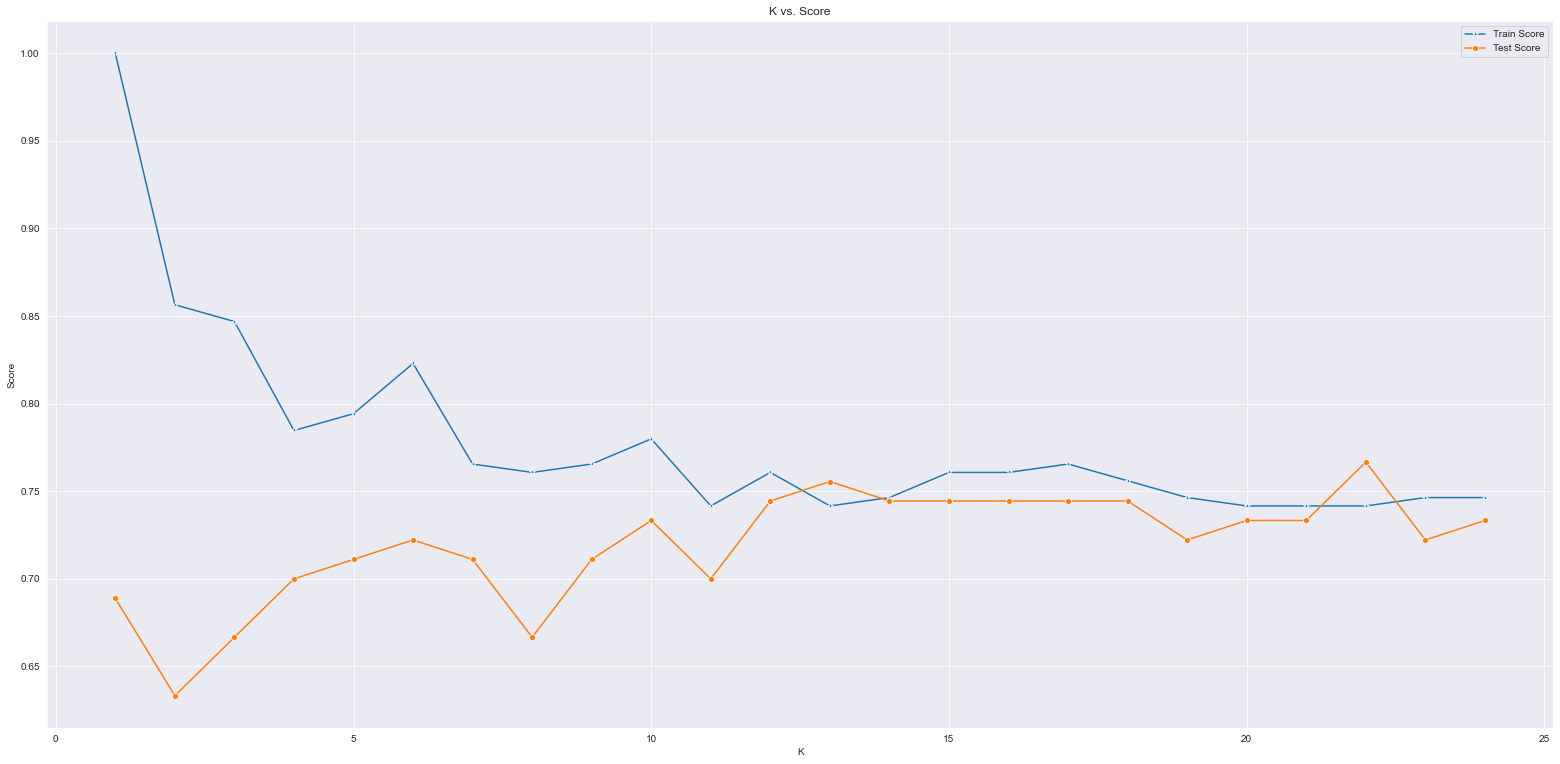

In [ ]:
sns.lineplot(x=range(1, 25), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, 25), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [ ]:
knn = KNeighborsClassifier(22)

knn.fit(X_train,y_train)
print("KNN Score: ", knn.score(X_test,y_test))

print("KNN Cross Validation Score: ", cross_val_score(knn, X, y, cv=3).mean())

KNN Score:  0.7666666666666667
KNN Cross Validation Score:  0.749023569023569


              precision    recall  f1-score   support

           0       0.81      0.62      0.70        40
           1       0.75      0.88      0.81        50

    accuracy                           0.77        90
   macro avg       0.78      0.75      0.76        90
weighted avg       0.77      0.77      0.76        90



Text(0.5, 1.0, 'KNN Confusion Matrix')

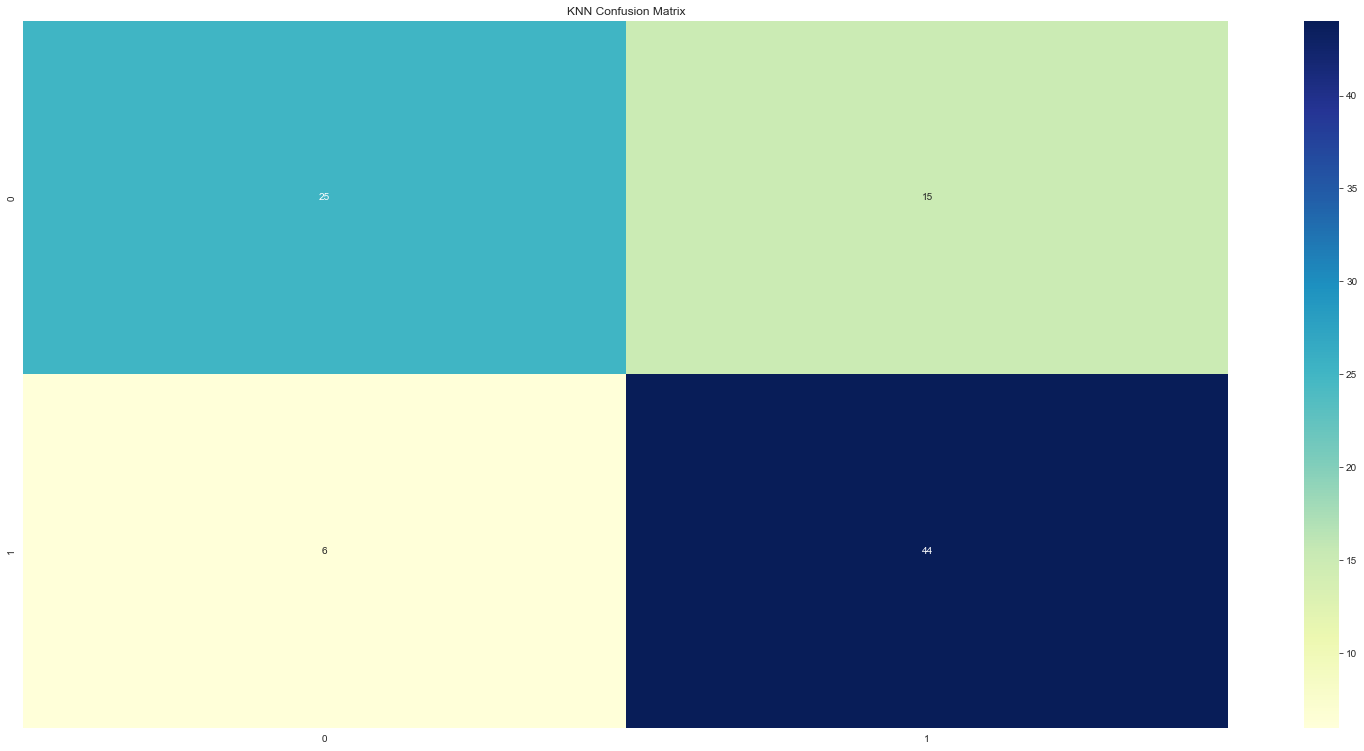

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)

print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu")
plt.title("KNN Confusion Matrix")

# LOGISTIC REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
predictions = logmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.79      0.65      0.71        40
           1       0.75      0.86      0.80        50

    accuracy                           0.77        90
   macro avg       0.77      0.76      0.76        90
weighted avg       0.77      0.77      0.76        90



Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

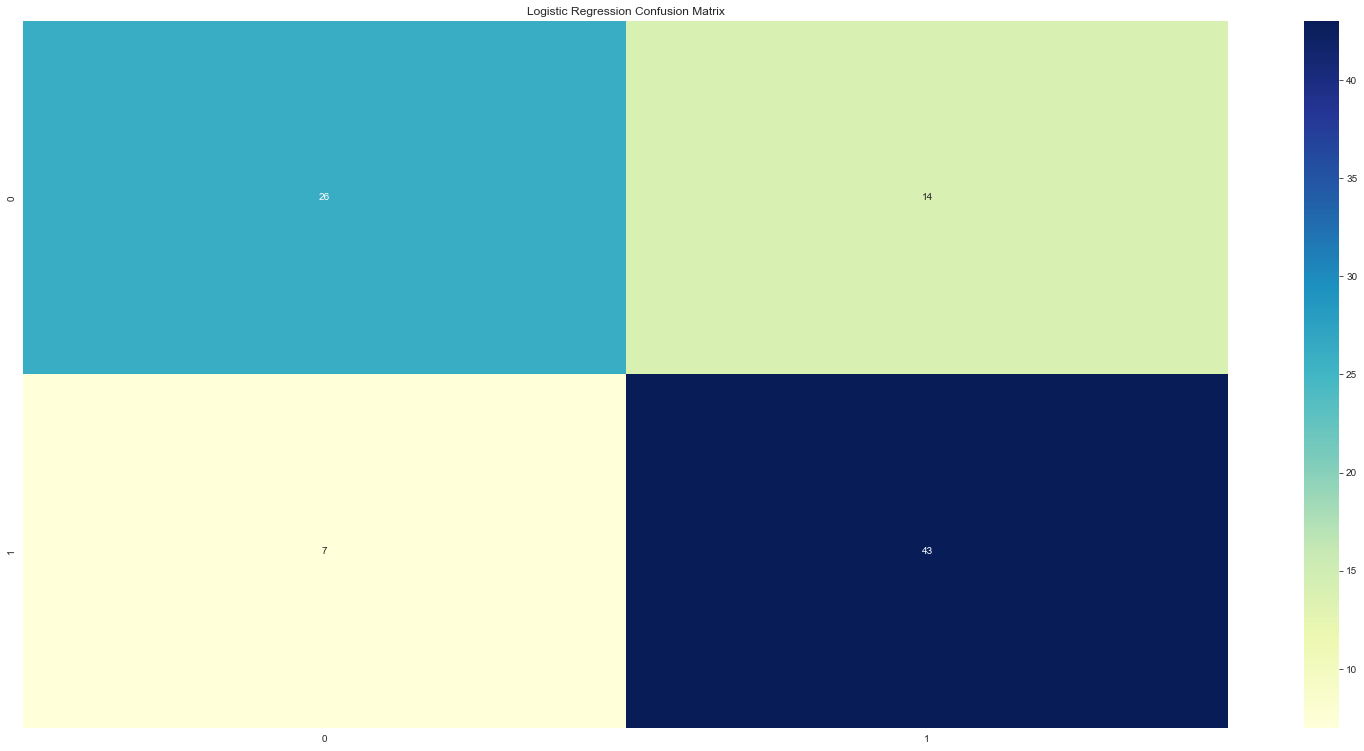

In [ ]:
print(classification_report(y_test,predictions))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, cmap="YlGnBu")
plt.title("Logistic Regression Confusion Matrix")

In [ ]:
print("KNN:     ", cross_val_score(knn, X, y, cv=3).mean())
print("LOG_REG: ", cross_val_score(logmodel, X, y, cv=3).mean())

KNN:      0.749023569023569
LOG_REG:  0.7223569023569024
